In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely

In [2]:
# 

In [3]:
dfNA = pd.read_csv('casesNA.csv',compression = 'gzip')
dfCA = pd.read_csv('casesCanada.csv',compression = 'gzip')
dfUS = pd.read_csv('casesUS.csv',compression = 'gzip')

In [4]:
provs = dfCA.groupby(["Province/State"])["Province/State"].count().reset_index(name = "Count")
states = dfUS.groupby(["Province/State"])["Province/State"].count().reset_index(name = "Count")
counties = dfUS.groupby(["County", "Province/State"])["County"].count().reset_index(name = "Count")

In [5]:
# counties.sort_values(by = "Province/State")

In [6]:
# states

In [7]:
# provs

In [8]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
gdfus = gpd.GeoDataFrame(dfUS, geometry = gpd.points_from_xy(dfUS.Longitude, dfUS.Latitude))
gdfca = gpd.GeoDataFrame(dfCA, geometry = gpd.points_from_xy(dfCA.Longitude, dfCA.Latitude))

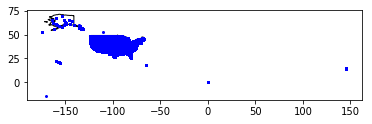

In [9]:
# Interesting.... find a way to make them less ugly 
ax = world[world.name == 'United States of America'].plot(color='white', edgecolor='black')
gdfus.plot(ax = ax, color = 'blue', markersize = 1)
plt.show()

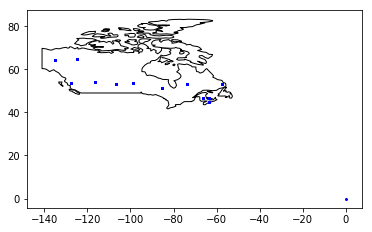

In [10]:
ax = world[world.name == 'Canada'].plot(color='white', edgecolor='black')
gdfca.plot(ax = ax, color = 'blue', markersize = 1)
plt.show()

In [18]:
# Refer to features here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
totalCan = dfCA.groupby(["Province/State", "Date"])["Confirmed"].sum().reset_index(name = "Count")

In [32]:
temp = totalCan.shift(1)
totalCan['Difference'] = totalCan['Count'] - temp['Count']

In [34]:
# Group by provinces; find difference in cases between the next day and day before
# Neg diff: did someone die or recover? Correction in case count?
# 0 diff: no increase or decrease
# totalCan

In [37]:
totalUS = dfUS.groupby(["Province/State", "Date"])["Confirmed"].sum().reset_index(name = "Count")

In [39]:
temp = totalUS.shift(1)
totalUS['Difference'] = totalUS['Count'] - temp['Count']

In [60]:
nyCount = totalUS.loc[(totalUS["Province/State"] == "New York")].reset_index(drop = True)
bcCount = totalCan.loc[(totalCan["Province/State"] == "British Columbia")].reset_index(drop = True)

In [72]:
# Set first row diff to NaN
nyCount.loc[0, "Difference"] = np.NaN
#bcCount

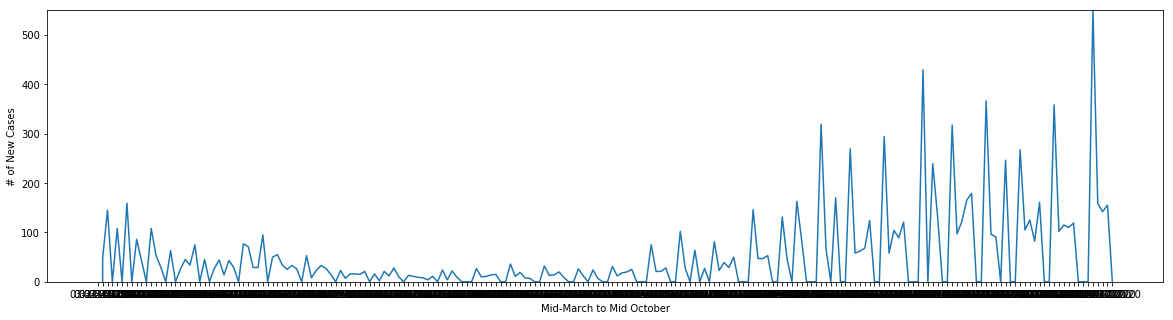

In [95]:
# Fix graph
plt.figure(figsize = (20,5))
plt.ylim(0,550)
plt.xlabel("Mid-March to Mid October")
plt.ylabel("# of New Cases")
plt.plot(bcCount["Date"], bcCount["Difference"])

In [74]:
nyCount

,Province/State,Date,Count,Difference
0,New York,03-22-2020,15800,NaN
1,New York,03-23-2020,20884,5084.0
2,New York,03-24-2020,25681,4797.0
3,New York,03-25-2020,30841,5160.0
4,New York,03-26-2020,37877,7036.0
5,New York,03-27-2020,44876,6999.0
6,New York,03-28-2020,52410,7534.0
7,New York,03-29-2020,59648,7238.0
8,New York,03-30-2020,66663,7015.0
9,New York,03-31-2020,75833,9170.0
